Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

# CSE 30 Fall 2021 - Homework 10

## Graphs


### Instructions

Please disregard the YOUR NAME and COLLABORATORS above.  They are put there atomatically by the grading tool.
You can find instructions on how to work on a homework on Canvas.  Here is a short summary: 

### Submitting your work

To submit your work: 

* First, click on "Runtime > Restart and run all", and check that you get no errors.  This enables you to catch any error you might have introduced, and not noticed, due to your running cells out of order. 
* Second, download the notebook in .ipynb format (File > Download .ipynb) and upload the .ipynb file to [this form](https://docs.google.com/forms/d/e/1FAIpQLSd6nCKj1zOfJMFDyTjqXJdk0WlI3yil3rMDTHKQRsNZ73h6ZQ/viewform?usp=sf_link). 

You can submit multiple times; the last submission before the deadline is the one that counts.

### Homework format

For each question in this notebook, there is: 

* A text description of the problem. 
* One or more places where you have to insert your solution.  You need to complete every place marked: 

    `# YOUR CODE HERE`
    
    and you should not modify any other place. 
* One or more test cells.  Each cell is worth some number of points, marked at the top.  You should not modify these tests cells.  The tests pass if no error is printed out: when there is a statement that says, for instance: 

    `assert x == 2`
    
    then the test passes if `x` has value 2, and fails otherwise.  You can insert a `print(x)` (for this case!) somewhere if you want to debug your work; it is up to you.  
    
### Notes:

* Your code will be tested both according to the tests you can see (the `assert` statements you can see), _and_ additional tests.  This prevents you from hard-coding the answer to the particular questions posed.  Your code should solve the _general_ intended case, not hard-code the particular answer for the values used in the tests. 

* **Please do not delete or add cells!** The test is autograded, and if you modify the test by adding or deleting cells, even if you re-add cells you delete, you may not receive credit. 

* **Please do not import modules that are not part of the [standard library](https://docs.python.org/3/library/index.html).** You do not need any, and they will likely not available in the grading environment, leading your code to fail. 

* **If you are inactive too long, your notebook might get disconnected from the back-end.** Your work is never lost, but you have to re-run all the cells before you continue. 

* You can write out print statements in your code, to help you test/debug it. But remember: the code is graded on the basis of what it outputs or returns, not on the basis of what it prints.

* **TAs and tutors have access to this notebook,** so if you let them know you need their help, they can look at your work and give you advice. 

### Grading

Each cell where there are tests is worth a certain number of points.  You get the points allocated to a cell only if you pass _all_ the tests in the cell. 

The tests in a cell include both the tests you can see, and other, similar, tests that are used for grading only.  Therefore, you cannot hard-code the solutions: you really have to solve the essence of the problem, to receive the points in a cell. 

### Code of Conduct

* Work on the test yourself, alone. 
* You can search documentation on the web, on sites such as the Python documentation sites, Stackoverflow, and similar, and you can use the results. 
* You cannot share your work with others or solicit their help.


## About This Homework

The homework consists of 4 questions, for a total of 90                            points.

The instructions for working on homework assignments are available on Canvas; as a summary:

* Write your code only where indicated via 

        # YOUR CODE HERE
    If you write code in other places, it will be discarded during grading.
* Do not add/remove cells.
* The tests are implemented with assert statements: if they fail, you will see an error (a Python exception). If you see no error, you can assume that they pass.

Once you are done working on it, you can download the .ipynb and [submit to this Google Form](https://docs.google.com/forms/d/e/1FAIpQLSe7gGOiIELvfI9ImU5Xf8idU44DbS9zEtskln5wBoP2OS2giw/viewform?usp=sf_link).

Assume you have to prepare Pasta Carbonara.   My version of the recipe goes like this: 

> Dice onions and pancetta, and fry in a mix of olive oil and butter, slowly.  Separately, put in a bowl as many eggs as there are dinner guests; you can either put in the bowls the yolks only, or you can add a few whites if you wish.  Beat the eggs.  
> Bring water to a boil, and when it boils, salt it.  Put the pasta in (I like Penne Rigate).   When cooked, colander the water away, and quickly unite in the bowl the beaten eggs, the pasta, and the pancetta.  Mix well and serve immediately. 

If you have to invite people over, you could do this recipe sequentially, and first worry about cooking the pasta: warming the water, putting the pasta in, then colandering it.  Then you could worry about cooking the pancetta and onions.  When that's done, you can start to beat the eggs. Finally, you could unite everything.  Technically, that would work, but there would be two problems.  The first is that, of course, the pasta would be rather cold by the time it would be served, a capital sin (pasta must be served immediately after it is cooked).  Secondly, even if you rehash the order so that you first cook the pancetta, then beat the eggs, then cook the pasta, then technically this works -- but it would take you well over one hour to have everything ready.  You want to do things in parallel, cooking the pancetta while heating up the water for the pasta, and so forth.  You want to discover what are the things that need to be done one after the other, and what are the things that can be done in parallel, and in which order to do everything.  

Great cooking, by the way, is much about the perfect timing, not only the perfect preparation.  You have to have the various preparations ready at the same time, to unite them just right.  We will worry about timing in the second part of this chapter; first, we worry about what we can do and in which order.

As an aside for those of you who are more interested in compiling code than in cooking, the problem of how to compile C or C++ code is very similar.  A makefile defines dependencies between tasks: you have to have compiled pathlib.c before you can link the result together with something else.  The task of the make program is to figure out how to parallelize the compilation, so that independent tasks can happen in different processes (possibly on different CPU cores), while respecting the precedence constraints between tasks.  We will mention this application in some of the exercises of the chapter. 





## Scheduling dependent tasks

We first disregard the problem of cooking (or compiling) time, and ask about the order in which we should be doing the tasks.  We want to create a _Scheduler_ object, that can tell us what to do at the same time.  What operations should this object support? 

* **add_task:** we should be able to add a task, along with the task dependencies. 
* **reset:** indicating that we are about to run the sequences of tasks again.
* **available_tasks:** this property should return the set of things that we can do in parallel. 
* **mark_completed:** used to notify the scheduler that we have completed a task.  This should return the set of new tasks that we can do due to this task being completed; we can do these tasks in parallel alongside with the others that we are already doing. 
* **all_done:** returns True/False according to whether we have completed all tasks. 

Choosing these operations is perhaps the most important step in the design of the scheduler.  The operations need to have a simple, clear definition, and be useful in a concrete implementation of the service which will run the tasks.  Of the above operations, they are all uncontroversial, except for the choice of behavior of _completed_.  In theory, there is no need for _completed_ to return the set of _new_ tasks that can now be undertaken.  If one remembers the set of tasks $T_1$ one can a do before a task $t \in T_1$ is completed, and marks $t$ as completed, one can simply ask the scheduler for the set of tasks $T_2$ that can now be done, and add those in $T_{21t} = T_2 \setminus (\{t\} \cup T_1)$ for execution.  However, we guess (as we have not yet written the task execution engine) that being told this set of tasks directly will simplify the design of the task execution engine. 

Our scheduler class will be implemented in similar fashion to our graph class, with tasks corresponding to graph vertices, and dependencies represented as edges.
The difference is that here, given a vertex (that is, a task) $v$, it will be useful to be able to access both:

* the _predecessors_ of $v$, that is, the tasks $u$ that are declared as prerequisites of $v$, and 
* the _successors_ of $v$, that is, the tasks $u$ such that $v$ was declared as a prerequisite for $u$. 

When we add a task, we would have to initialize its set of successors and predecessors to empty.  This is somewhat tedious, and so we resort to a defaultdict, which is a special type of dictionary such that, if the mapping for a key has not been defined, it returns a default value; in our case, an empty set.  [You can read more about defaultdict and related types here](https://docs.python.org/3.7/library/collections.html#collections.defaultdict). 

Our first implementation of the class is as follows.  We let you complete the `available_tasks` and `mark_completed` methods. 


In [2]:
from collections import defaultdict
import networkx as nx # Library for displaying graphs.
import matplotlib.pyplot as plt

class DependencyScheduler(object):

    def __init__(self):
        self.tasks = set()
        # The successors of a task are the tasks that depend on it, and can
        # only be done once the task is completed.
        self.successors = defaultdict(set)
        # The predecessors of a task have to be done before the task.
        self.predecessors = defaultdict(set)
        self.completed_tasks = set() # completed tasks

    def add_task(self, t, dependencies):
        """Adds a task t with given dependencies."""
        # Makes sure we know about all tasks mentioned.
        assert t not in self.tasks or len(self.predecessors[t]) == 0, "The task was already present."
        self.tasks.add(t)
        self.tasks.update(dependencies)
        # The predecessors are the tasks that need to be done before.
        self.predecessors[t] = set(dependencies)
        # The new task is a successor of its dependencies.
        for u in dependencies:
            self.successors[u].add(t)

    def reset(self):
        self.completed_tasks = set()

    @property
    def done(self):
        return self.completed_tasks == self.tasks


    def show(self):
        """We use the nx graph to display the graph."""
        g = nx.DiGraph()
        g.add_nodes_from(self.tasks)
        g.add_edges_from([(u, v) for u in self.tasks for v in self.successors[u]])
        node_colors = ''.join([('g' if v in self.completed_tasks else 'r')
                           for v in self.tasks])
        nx.draw(g, with_labels=True, node_color=node_colors)
        plt.show()

    @property
    def uncompleted(self):
        """Returns the tasks that have not been completed.
        This is a property, so you can say scheduler.uncompleted rather than
        scheduler.uncompleted()"""
        return self.tasks - self.completed_tasks

    def _check(self):
        """We check that if t is a successor of u, then u is a predecessor
        of t."""
        for u in self.tasks:
            for t in self.successors[u]:
                assert u in self.predecessors[t]


## Question 1: implement `available_tasks` and `mark_completed`. 

In [3]:
### Implementation of `available_tasks` and `mark_completed`.

def scheduler_available_tasks(self):
    """Returns the set of tasks that can be done in parallel.
    A task can be done if all its predecessors have been completed.
    And of course, we don't return any task that has already been
    completed."""
    # YOUR CODE HERE
    # for a task to be available, we have to make sure that its dependencies are also complete or has no dependencies
    avail_tasks = []
    for task in self.uncompleted:
      count = 0
      for predecessor in self.predecessors[task]:
        if predecessor not in self.completed_tasks:
          count+=1
      if count == 0:
        avail_tasks.append(task)
    return set(avail_tasks)



def scheduler_mark_completed(self, t):
    """Marks the task t as completed, and returns the additional
    set of tasks that can be done (and that could not be
    previously done) once t is completed."""
    # YOUR CODE HERE
    before = list(self.available_tasks)
    self.completed_tasks.add(t)
    after = list(self.available_tasks)
    return set([item for item in after if item not in before])

DependencyScheduler.available_tasks = property(scheduler_available_tasks)
DependencyScheduler.mark_completed = scheduler_mark_completed


In [4]:
# Here is a place where you can test your code. 

# YOUR CODE HERE
import random
for _ in range(10000):
    s=DependencyScheduler()
    max=10
    tasks=[a for a in range(max)]
    dependentDict={}
    l=random.randint(0,max)
    for i in range(l):
        task=tasks.pop(tasks.index(random.choice(tasks)))
        d=[str(a) for a in random.sample(tasks, random.randint(0, len(tasks)))]
        dependentDict[str(task)]=d
        for a in d:
            dependentDict[a]=[] if a not in dependentDict else dependentDict[a]
        s.add_task(str(task), d)
    while len(dependentDict)>0:
        testedAvail=s.available_tasks
        trueAvail={a for a in dependentDict if dependentDict[a]==None or len(dependentDict[a])==0}
        try:
            assert testedAvail==trueAvail
        except:
            print('task/depend',dependentDict)
            print('tested available',testedAvail)
            print('actual available',trueAvail)
            s.show()
            assert testedAvail==trueAvail
        toDo = random.choice(list(trueAvail))
        MarkCompleted=s.mark_completed(toDo)
        dependentDict.pop(toDo)
        for a in dependentDict:
            if toDo in dependentDict[a]:
                dependentDict[a].remove(toDo)
        newTrueAvail={a for a in dependentDict if dependentDict[a]==None or len(dependentDict[a])==0}
        newTestAvail=s.available_tasks
        try:
            assert newTestAvail==newTrueAvail
            assert (MarkCompleted==set() or MarkCompleted.issubset(newTrueAvail)) and (MarkCompleted==set() or not MarkCompleted.issubset(trueAvail))
        except:
            print('task/depend',dependentDict)
            print('tested available',newTestAvail)
            print('actual available',newTrueAvail)
            print('your mark_completed of',toDo,':',MarkCompleted)
            s.show()
            assert newTestAvail==newTrueAvail
            assert (MarkCompleted==set() or MarkCompleted.issubset(newTrueAvail)) and (MarkCompleted==set() or not MarkCompleted.issubset(trueAvail))

Let us check if this works.

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:474: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


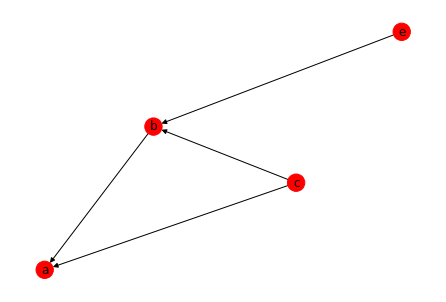

In [5]:
s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
s.add_task('b', ['c', 'e'])
s._check()
s.show()


We note that in the above drawing, the edges denote temporal succession, that is, an edge from $c$ to $a$ means that $c$ must happen before $a$. 
Let us execute the schedule manually.

Here are some tests for `available_tasks` and `mark_completed`. 

In [6]:
### Simple tests. 5 points. 

s = DependencyScheduler()
s.add_task('a', [])
assert s.available_tasks == {'a'}

s = DependencyScheduler()
assert s.available_tasks == set()


In [7]:
### Slightly more complicated. 4 points. 

s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
s.add_task('b', ['c', 'e'])
assert s.available_tasks == {'e', 'c'}

s = DependencyScheduler()
s.add_task('a', ['b'])
s.add_task('b', ['a'])
assert s.available_tasks == set()

In [8]:
# Hidden tests, 6 points. 


In [9]:
### Now, let's test `mark_completed`.  Simple tests first. 2 points. 

s = DependencyScheduler()
s.add_task('a', [])
assert s.available_tasks, {'a'}
r = s.mark_completed('a')
assert r == set()

s = DependencyScheduler()
s.add_task('a', ['b'])
assert s.available_tasks == {'b'}
r = s.mark_completed('b')
assert r == {'a'}

In [10]:
### Hidden tests.  3 points. 




In [11]:
### Slightly more complicated. 4 points. 

def assert_equal(a, b):
    assert a == b

s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
assert_equal(s.available_tasks, {'b', 'c'})
r = s.mark_completed('b')
assert_equal(r, set())
assert_equal(s.available_tasks, {'c'})
r = s.mark_completed('c')
assert_equal(r, {'a'})

s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
s.add_task('b', ['c', 'e'])
s.add_task('c', [])
assert_equal(s.available_tasks, {'c', 'e'})
r = s.mark_completed('e')
assert_equal(r, set())
r = s.mark_completed('c')
assert_equal(r, {'b'})
r = s.mark_completed('b')
assert_equal(r, {'a'})
r = s.mark_completed('a')
assert_equal(r, set())
assert_equal(s.available_tasks, set())



In [12]:
### Hidden tests. 6 points. 


## Executing the tasks

Here is an execution engine for our tasks with dependencies.

In [13]:
import random

def execute_schedule(s, show=False):
    s.reset()
    in_process = s.available_tasks
    print("Starting by doing:", in_process)
    while len(in_process) > 0:
        # Picks one random task to be the first to be completed.
        t = random.choice(list(in_process))
        print("Completed:", t)
        in_process = in_process - {t} | s.mark_completed(t)
        print("Now doing:", in_process)
        if show:
            s.show()
    # Have we done all?
    if not s.done:
        print("Error, there are tasks that could not be completed:", s.uncompleted)


Let's try it on our old schedule:

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:474: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


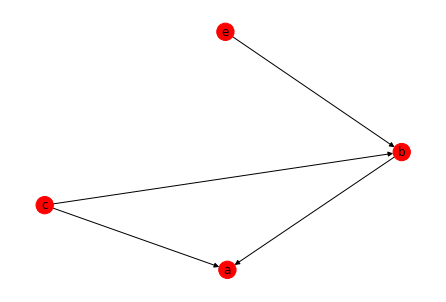

In [14]:
s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
s.add_task('b', ['c', 'e'])
s._check()
s.show()


Starting by doing: {'c', 'e'}
Completed: e
Now doing: {'c'}


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:474: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


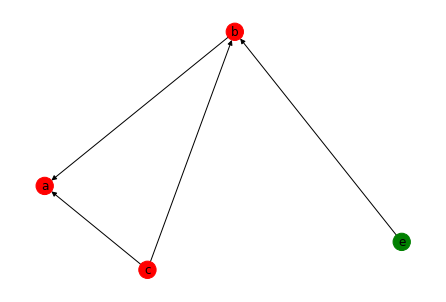

Completed: c
Now doing: {'b'}


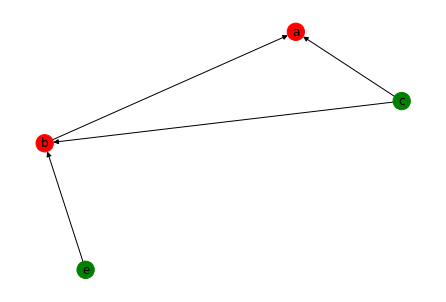

Completed: b
Now doing: {'a'}


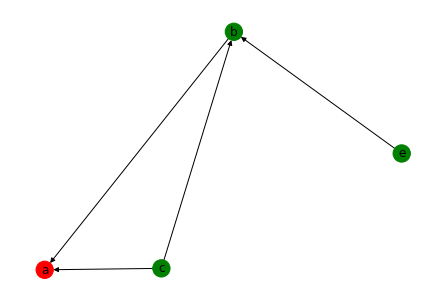

Completed: a
Now doing: set()


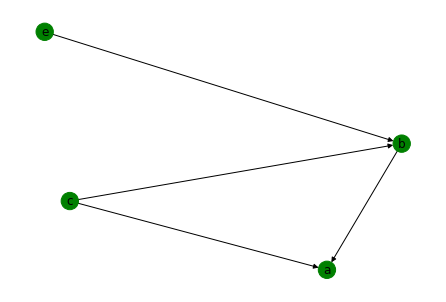

In [15]:
execute_schedule(s, show=True)


What happens if there is a loop? 

In [16]:
s = DependencyScheduler()
s.add_task('a', ['b'])
s.add_task('b', ['a'])
s.add_task('c', ['a'])
execute_schedule(s)


Starting by doing: set()
Error, there are tasks that could not be completed: {'c', 'b', 'a'}


Ok, this is reasonable!  Let us now encode our Carbonara pasta recipe. 

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:474: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


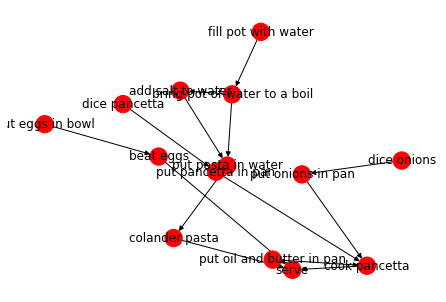

In [17]:
carbonara = DependencyScheduler()

# First, the part about cooking the pancetta.
carbonara.add_task('dice onions', [])
carbonara.add_task('dice pancetta', [])
carbonara.add_task('put oil and butter in pan', [])
carbonara.add_task('put pancetta in pan', ['dice pancetta'])
carbonara.add_task('put onions in pan', ['dice onions'])
carbonara.add_task('cook pancetta', ['put oil and butter in pan',
                                     'put pancetta in pan',
                                     'put onions in pan'])

# Second, the part about beating the eggs.
carbonara.add_task('put eggs in bowl', [])
carbonara.add_task('beat eggs', ['put eggs in bowl'])

# Third, cooking the pasta.
carbonara.add_task('fill pot with water', [])
carbonara.add_task('bring pot of water to a boil', ['fill pot with water'])
carbonara.add_task('add salt to water', ['bring pot of water to a boil'])
carbonara.add_task('put pasta in water', ['bring pot of water to a boil',
                                         'add salt to water'])
carbonara.add_task('colander pasta', ['put pasta in water'])

# And finally, we can put everything together.
carbonara.add_task('serve', ['beat eggs', 'cook pancetta', 'colander pasta'])

# Let's look at our schedule!
carbonara.show()


In [18]:
# And let's finally prepare carbonara!
execute_schedule(carbonara)


Starting by doing: {'fill pot with water', 'dice onions', 'put oil and butter in pan', 'dice pancetta', 'put eggs in bowl'}
Completed: put oil and butter in pan
Now doing: {'dice onions', 'fill pot with water', 'dice pancetta', 'put eggs in bowl'}
Completed: dice onions
Now doing: {'put onions in pan', 'fill pot with water', 'dice pancetta', 'put eggs in bowl'}
Completed: fill pot with water
Now doing: {'put onions in pan', 'dice pancetta', 'bring pot of water to a boil', 'put eggs in bowl'}
Completed: put onions in pan
Now doing: {'put eggs in bowl', 'dice pancetta', 'bring pot of water to a boil'}
Completed: put eggs in bowl
Now doing: {'beat eggs', 'dice pancetta', 'bring pot of water to a boil'}
Completed: dice pancetta
Now doing: {'beat eggs', 'put pancetta in pan', 'bring pot of water to a boil'}
Completed: beat eggs
Now doing: {'put pancetta in pan', 'bring pot of water to a boil'}
Completed: put pancetta in pan
Now doing: {'cook pancetta', 'bring pot of water to a boil'}
Comple

This is not necessarily the best order of actions to prepare pasta carbonara, but it definitely works as a schedule.

## Building a Better Execution Engine

Let us build a better execution engine for our schedules.  Right now, we have a function:

In [19]:
def execute_schedule(s, show=False):
    s.reset()
    in_process = s.available_tasks
    print("Starting by doing:", in_process)
    while len(in_process) > 0:
        # Picks one random task to be the first to be completed.
        t = random.choice(list(in_process))
        print("Completed:", t)
        in_process = in_process - {t} | s.mark_completed(t)
        print("Now doing:", in_process)
        if show:
            s.show()
    # Have we done all?
    if not s.done:
        print("Error, there are tasks that could not be completed:", s.uncompleted)


We want to wrap these methods into a class, RunSchedule.  This will allow us more flexibility in executing a schedule, as we will be able to specify parameters that guide the execution policy, interrupt and resume the execution, and so on.  
An object of class RunSchedule is initialized with a DependencyScheduler.  It then has the following methods: 

* **reset:** mark all tasks as not completed. 
* **step:** perform one step in the schedule, completing a single task.
* **run:** performs all steps in the schedule, until completion. 
* **done:** indicates that all tasks have been done.

What should these methods return?  _step_ will return the task executed, while _run_ will return the whole list of tasks, in the order in which they were done. 

In [20]:
class RunSchedule(object):

    def __init__(self, scheduler):
        self.scheduler = scheduler
        self.in_process = None # Indicating, we don't know yet.

    def reset(self):
        self.scheduler.reset()
        self.in_process = None

    def step(self):
        """Performs a step, returning the task, if any, or None,
        if there is no step that can be done."""
        # If we don't know what steps are in process, we get them.
        if self.in_process is None:
            self.in_process = self.scheduler.available_tasks
        if len(self.in_process) == 0:
            return None
        t = random.choice(list(self.in_process))
        self.in_process = self.in_process - {t} | self.scheduler.mark_completed(t)
        return t

    @property
    def done(self):
        return self.scheduler.done

    def run(self):
        """Runs the scheduler from the current configuration to completion.
        You must call reset() first, if you want to run the whole schedule."""
        tasks = []
        while not self.done:
            t = self.step()
            if t is not None:
                tasks.append(t)
        return tasks


We can run our pasta carbonara with this RunSchedule class:

In [21]:
runner = RunSchedule(carbonara)
runner.reset()
runner.run()


['dice onions',
 'put eggs in bowl',
 'beat eggs',
 'put onions in pan',
 'put oil and butter in pan',
 'fill pot with water',
 'dice pancetta',
 'bring pot of water to a boil',
 'add salt to water',
 'put pasta in water',
 'put pancetta in pan',
 'colander pasta',
 'cook pancetta',
 'serve']

Let us pause for a moment and ask: did we really need to create a new class? Could we not have done the above in the scheduler class? 

This is debatable.  The idea in keeping the two classes separate is clarity of goals: 

* The scheduler is concerned with what _can_ be done next. 
* The runner is concerned with any practical constraint to the execution, and with the choice of _what_, among the possible, is actually done. 

We will have occasion below to rely on this division of concerns.

### Code changes and rotten eggs

#### Code changes

Imagine that you need to compile three programs, `a`, `b`, `c`, and then link together the results into `f.out`.   Once this is done, you compile `d` and `e`, and link into `g.out`.  As the last step, you link the two libraries `g.out` and `f.out` together, and produce `h`. You do it once.  Great.  But now you realize that you need to change `b`.  Do you have to start from scratch? 

You may think, who cares, it's the CPU doing the work, not me.  Fair enough, but there are some large systems that take minutes, dozen of minutes, to compile.  If you are compiling the linux kernel on a low power CPU, it might take hours.  Surely you don't want to redo everything from scratch!  

So imagine you have the tasks in an intermediate state, with some being completed (possibly all of them), and some not.  You can now mark one of the tasks as incomplete, to signal you need to do it again.  What is the set of tasks that as a consequence should also be marked incomplete? 
If you have two tasks $x$ and $y$, with $y$ being a successor to $x$, if $x$ is marked as "undone" as it needs to be redone, then also $y$ will need to be redone, as it might use the results of $x$.

To implement this, we will perform two modifications.  First, we will endow our scheduler with a _redo_ method, which marks a task and all its successors (and the successors of the successors, and so forth) to be redone -- that is, it _unmarks_ them as done.  We let you implement this; you have already seen how to compute reachability in the graph chapter. 


## Question 2: redo for code

In [22]:
### Implementation of `redo`

def dependency_scheduler_redo(self, t):
    """Mark the task t, and all its successors, as undone.
    Returns the set of successor tasks of t, with t included."""
    # YOUR CODE HERE
    # items = [t]
    # self.completed_tasks.remove(t)
    # for s in self.successors[t]:
    #   if s in self.completed_tasks:
    #     items = items + list(self.redo(s))
    # print(t,self.successors[t])
    # return set(items)
    topen = {t}
    tclosed = set()
    while len(topen) > 0:
        u = topen.pop()
        if u in self.completed_tasks:
          self.completed_tasks.remove(u)
          tclosed.add(u)
          topen.update(self.successors[u] - tclosed)
    return set(list(tclosed))

DependencyScheduler.redo = dependency_scheduler_redo


In [23]:
# Here is a place where you can test your code. 

# YOUR CODE HERE

def reachable_from_hw_10(g, v):
    """Given a graph g, and a starting vertex v, returns the set of states
    reachable from v in g."""
    vopen = {v}
    vclosed = set()
    while len(vopen) > 0:
        u = vopen.pop()
        vclosed.add(u)
        vopen.update(g.successors[u] - vclosed)
    return vclosed

import random
for _ in range(10000):
    s=DependencyScheduler()
    sCopy=DependencyScheduler()
    max=4
    tasks=[a for a in range(max)]
    dependentDict={}
    l=random.randint(1,max)
    for i in range(l):
        task=tasks.pop(tasks.index(random.choice(tasks)))
        d=[str(a) for a in random.sample(tasks, random.randint(0, len(tasks)))]
        dependentDict[str(task)]=d
        for a in d:
            dependentDict[a]=[] if a not in dependentDict else dependentDict[a]
        s.add_task(str(task),d)
        sCopy.add_task(str(task),d)
    doNum = random.randint(1,l)
    done = []
    while len(dependentDict)>=doNum:
        toDo = random.choice(list(s.available_tasks))
        done.append(toDo)
        s.mark_completed(toDo)
        sCopy.mark_completed(toDo)
        dependentDict.pop(toDo)
        for a in dependentDict:
            if toDo in dependentDict[a]:
                dependentDict[a].remove(toDo)
    uncomp = s.uncompleted
    toRedo=done.pop(done.index(random.choice(done)))
    sredo=s.redo(toRedo)
    ans=reachable_from_hw_10(s,toRedo)
    for a in ans:
      if a in uncomp:
        ans=ans-{a}
    try:
        assert sredo|uncomp==s.uncompleted or sredo == {None}
        assert ans==sredo
    except:
        print('old:')
        sCopy.show()
        print('tried to redo',toRedo)
        print('should return',ans)
        print(' you returned',sredo)
        print(s.uncompleted,'!=',sredo,'+',uncomp,'=',sredo|uncomp)
        s.show()
        assert sredo|uncomp==s.uncompleted or sredo == {None}
        assert ans==sredo

Let us test the implementation.

In [24]:
### Tests for `redo` for code. 5 points. 

def assert_equal(a, b):
    assert a == b

s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', ['a'])
s.add_task('c', ['a'])
s.add_task('d', ['b', 'c'])
s.add_task('e', ['a', 'd'])

s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
assert_equal(s.available_tasks, {'d'})
s.redo('b')
assert_equal(s.available_tasks, {'b'})

# Additional test
s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', ['a'])
s.add_task('c', ['a'])
s.add_task('d', ['b', 'c'])
s.add_task('e', ['a', 'd'])

s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
s.mark_completed('d')
s.redo('a')
assert_equal(s.available_tasks, {'a'})

s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', ['a'])
s.add_task('c', ['a'])
s.add_task('d', ['b', 'c'])
s.add_task('e', ['a', 'd'])
s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
assert_equal(s.available_tasks, {'d'})
s.mark_completed('d')
s.mark_completed('e')
s.redo('e')
assert_equal(s.available_tasks, {'e'})


In [25]:
### Hidden tests.  5 points. 


Next, we implement a runner that has an additional operation _redo(t)_ for a task t. 

In [26]:
def run_schedule_redo(self, t):
    """Marks t as to be redone."""
    # We drop everything that was in progress.
    # This also forces us to ask the scheduler for what to redo.
    self.in_process = None
    return self.scheduler.redo(t)

RunSchedule.redo = run_schedule_redo


We can now play with it. 

In [27]:
runner = RunSchedule(carbonara)
runner.reset()
for _ in range(10):
    print(runner.step())
print("---> readd salt")
print("marking undone:", runner.redo("add salt to water"))
print("completed:", runner.scheduler.completed_tasks)
for _ in range(10):
    print(runner.step())
print("--->redo dice pancetta")
print("marking undone:", runner.redo("dice pancetta"))
print("completed:", runner.scheduler.completed_tasks)
for t in runner.run():
    print(t)


fill pot with water
put eggs in bowl
dice pancetta
bring pot of water to a boil
put pancetta in pan
add salt to water
put oil and butter in pan
beat eggs
put pasta in water
dice onions
---> readd salt
marking undone: {'put pasta in water', 'add salt to water'}
completed: {'fill pot with water', 'dice onions', 'put oil and butter in pan', 'bring pot of water to a boil', 'put pancetta in pan', 'dice pancetta', 'beat eggs', 'put eggs in bowl'}
add salt to water
put onions in pan
put pasta in water
colander pasta
cook pancetta
serve
None
None
None
None
--->redo dice pancetta
marking undone: {'cook pancetta', 'serve', 'put pancetta in pan', 'dice pancetta'}
completed: {'fill pot with water', 'add salt to water', 'dice onions', 'put onions in pan', 'put oil and butter in pan', 'bring pot of water to a boil', 'colander pasta', 'put pasta in water', 'beat eggs', 'put eggs in bowl'}
dice pancetta
put pancetta in pan
cook pancetta
serve


You have learned to sequence the order in which to do tasks so as to respect their dependencies.  In the next chapter, we will learn how to also take into account the time it takes for us to do the tasks.  In the meantime, bon appetit, or rather, guten appetit, or rather, buon appetito!

#### Redoing in cooking

The act of redoing a cooking step is somewhat different than the act of redoing something in code.  Suppose you cook pasta, unite with it the fried bacon and onions, and then -- terrible mishap -- you unite with it the beaten egg yolks in which one of the eggs is rotten. 

In code, when one file changes, you only need to redo the things that _depend_ on that file.  In cooking, it is different: even if nothing changed in the bacon, onions, and cooked pasta, once you add to it rotten eggs you have to redo the pasta, bacon, onions, etc, as well, as they have now been contaminated.  The root of the problem is that in a makefile, when you combine two files to compute a result, you do not destroy the original files, whereas in cooking, once you combine foods, you don't have the original foods any longer.  Cooking is like a makefile in which, once you combine files, you immediately delete them. 

So let us come up with a precise definition of what needs to be redone in cooking, when one of the steps goes bad (the eggs are rotten, you burn the food on the stove, and so on). 

Initially, we label _redo_ the task that needs redoing.  We then propagate the label according to these two phases:

**Phase 1: Forward** 
Apply the following rule as long as it can be applied: 

* Consider a task $v$ labeled _redo_. If $u$ is a successor of $v$ and $u$ is completed, then $u$ is also labeled _redo_. 

**Phase 2: Backward**
Apply the following rule as long as it can be applied: 

* Consider a task $v$ labeled _redo_. If $u$ is a predecessor of $v$, then $u$ is also labeled _redo_ (note that in this case, we are guaranteed that $u$ is completed). 

The first rule corresponds to a _forward_ pass in the dependency garph; the second rule corresponds to a _backward_ pass in the dependency relation. 
Once the _redo_ label is propagated, all tasks that are marked _redo_ are changed from completed, to uncompleted. 

Note that you have to implement _once_ the forward phase, followed by _once_ the backward phase.  Example: you press some lemons, and you use a bit of the juice to make a mayonnaise, and another part to marinate shrimp.  If it turns out that the egg yolk used for the mayonnaise was rotten, you need to press a bit of lemon again, but you do not need to marinate the shrimp once more.

We ask you to implement this in code.

## Question 3: redo for recipes

In [28]:
### Implementation of `cooking_redo`

def dependency_scheduler_cooking_redo(self, v):
    """Indicates that the task v needs to be redone, as something went bad.
    This is the "cooking" version of the redo, in which the redo propagates
    to both successors (as for code) and predecessors."""
    # YOUR CODE HERE
    # ll = {v}
    # self.redo(v)
    # for s in self.successors[v]:
    #   if s in self.completed_tasks:
    #     self.redo(s)
    #     ll.append(s)
    # while len(ll) > 0:
    #   l = ll.pop()
    #   for p in self.predecessors[l]:
    #     self.redo(p)

    topen = {v}
    tclosed = set()
    while len(topen) > 0:
        u = topen.pop()
        if u in self.completed_tasks:
          self.redo_back(u)
        tclosed.add(u)
        topen.update(self.successors[u] - tclosed)

def dependency_scheduler_redo_back(self,t):
    topen = {t}
    tclosed = set()
    while len(topen) > 0:
        u = topen.pop()
        if u in self.completed_tasks:
          self.completed_tasks.remove(u)
        tclosed.add(u)
        topen.update(self.predecessors[u] - tclosed)
    

    # topen = {t}
    # tclosed = set()
    # while len(topen) > 0:
    #     u = topen.pop()
    #     if u in self.completed_tasks:
    #       self.completed_tasks.remove(u)
    #     tclosed.add(u)
    #     topen.update(self.successors[u] - tclosed)
    # return set(list(tclosed))


        
    


DependencyScheduler.cooking_redo = dependency_scheduler_cooking_redo
DependencyScheduler.redo_back = dependency_scheduler_redo_back


In [29]:
# Here is a place where you can test your code. 

# YOUR CODE HERE
def reachable_from_hw_10(g, v):
    """Given a graph g, and a starting vertex v, returns the set of states
    reachable from v in g."""
    vopen = {v}
    vclosed = set()
    while len(vopen) > 0:
        u = vopen.pop()
        vclosed.add(u)
        vopen.update(g.successors[u] - vclosed)
    return vclosed
import random
for _ in range(10000):
    s=DependencyScheduler()
    sCopy=DependencyScheduler()
    sReverse=DependencyScheduler()
    max=10
    tasks=[a for a in range(max)]
    dependentDict={}
    reverseDict={}
    l=random.randint(1,max)
    for i in range(l):
        task=tasks.pop(tasks.index(random.choice(tasks)))
        d=[str(a) for a in random.sample(tasks, random.randint(0, len(tasks)))]
        dependentDict[str(task)]=d
        for a in d:
            dependentDict[a]=[] if a not in dependentDict else dependentDict[a]
            print
            if a not in reverseDict:
                reverseDict[a]=[str(task)]
            else:
                reverseDict[a].append(str(task))
        s.add_task(str(task),d)
        sCopy.add_task(str(task),d)
    for a in reverseDict:
        sReverse.add_task(a,reverseDict[a])
    doNum=random.randint(1,l)
    done=[]
    depCopy=dependentDict.copy()
    while len(dependentDict)>doNum-1:
        toDo=random.choice(list(s.available_tasks))
        done.append(toDo)
        s.mark_completed(toDo)
        sCopy.mark_completed(toDo)
        dependentDict.pop(toDo)
        for a in dependentDict:
            if toDo in dependentDict[a]:
                dependentDict[a].remove(toDo)
    uncomp=s.uncompleted
    toRedo=done.pop(done.index(random.choice(done))) if len(done)>0 else None
    forward=reachable_from_hw_10(s,toRedo)-uncomp
    backward=set()
    for a in forward:
        backward.update(reachable_from_hw_10(sReverse,a))
    s.cooking_redo(toRedo)
 
    try:
        assert s.uncompleted-uncomp==backward
    except:
        print('tried to redo',toRedo)
        print(toRedo,"'s reachables:",reachable_from_hw_10(sCopy,toRedo))
        print('should make incomplete',backward)
        print('uncompleted tasks used to be',uncomp)
        print('   uncompleted tasks now are',s.uncompleted)
        print('old:')
        sCopy.show()
        print('after calling:')
        s.show()
        assert s.uncompleted-uncomp==backward

#extra tests
s = DependencyScheduler()
assert s.completed_tasks == set()
assert s.available_tasks==set()
s.cooking_redo(0)
assert s.completed_tasks == set()
assert s.available_tasks==set()
s.add_task('a', [])
s.add_task('b', [])
s.add_task('c', ['a', 'b'])
s.cooking_redo(0)
assert s.available_tasks=={'a', 'b'}
assert s.completed_tasks == set()
s.cooking_redo('a')
assert s.available_tasks=={'a', 'b'}
assert s.completed_tasks == set()
s.cooking_redo('b')
assert s.available_tasks=={'a', 'b'}
assert s.completed_tasks == set()
s.cooking_redo('c')
assert s.available_tasks=={'a', 'b'}
assert s.completed_tasks == set()

#extra tests
s = DependencyScheduler()
assert s.completed_tasks == set()
assert s.available_tasks==set()
s.cooking_redo(0)
assert s.completed_tasks == set()
assert s.available_tasks==set()
s.add_task('a', [])
s.add_task('b', [])
s.add_task('c', ['a', 'b'])
s.cooking_redo(0)
assert s.available_tasks=={'a', 'b'}
assert s.completed_tasks == set()
s.cooking_redo('a')
assert s.available_tasks=={'a', 'b'}
assert s.completed_tasks == set()
s.cooking_redo('b')
assert s.available_tasks=={'a', 'b'}
assert s.completed_tasks == set()
s.cooking_redo('c')
assert s.available_tasks=={'a', 'b'}
assert s.completed_tasks == set()

Let us check that the code works.  First, a simple example. 

In [30]:
### Basic tests for `cooking_redo`. 5 points. 

def assert_equal(a, b):
    assert a == b

s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', [])
s.add_task('c', ['a', 'b'])
s.add_task('e', [])
s.add_task('f', ['e'])
s.add_task('g', ['f', 'd'])
s.add_task('d', ['c'])

s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
s.mark_completed('d')
assert_equal(s.available_tasks, {'e'})
s.cooking_redo('c')
# When we redo c, both its successor d, and predecessors a, b have to be redone.
assert_equal(s.available_tasks, {'a', 'b', 'e'})
assert_equal(s.completed_tasks, set())


In [31]:
### Hidden tests.  5 points. 


And now, some slightly more sophisticated tests.

In [32]:
### Advanced tests for `cooking_redo`. 5 points. 

def assert_equal(a, b):
    assert a == b

s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', [])
s.add_task('c', ['a', 'b'])
s.add_task('d', ['c'])
s.add_task('e', [])
s.add_task('f', ['e'])
s.add_task('g', ['f', 'd'])

s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
s.mark_completed('d')
s.mark_completed('e')
assert_equal(s.available_tasks, {'f'})
s.cooking_redo('c')
# When we redo c, both its successor d, and predecessors a, b have to be redone.
assert_equal(s.available_tasks, {'a', 'b', 'f'})
assert_equal(s.completed_tasks, {'e'})

s = DependencyScheduler()
s.add_task('mayo', ['lemon juice', 'egg yolks', 'oil'])
s.add_task('marinated shrimp', ['shrimp', 'lemon juice'])
s.add_task('crevettes', ['marinated shrimp', 'mayo'])
s.mark_completed('lemon juice')
s.mark_completed('egg yolks')
s.mark_completed('oil')
s.mark_completed('shrimp')
s.mark_completed('marinated shrimp')
s.mark_completed('mayo')
assert s.available_tasks == {'crevettes'}
s.cooking_redo('egg yolks')
assert 'mayo' not in s.completed_tasks
assert 'marinated shrimp' in s.completed_tasks
assert 'egg yolks' not in s.completed_tasks

In [33]:
### Hidden tests. 5 points. 


## Question 4: Implement And-Or Schedules

In the schedules we have seen so far, the dependencies are in _and_ one with the other: if a task $a$ depends on $b, c$, then _both_ $b$ _and $c$ need to be completed before $a$ can be started. 
It is possible to consider also cases where dependencies are in an _or_ relation: if $a$ depends on $b, c$ in an _or_ way, then it suffices to complete one of $b$ _or_ $c$ before starting $a$. 
For instance, in our Carbonara Pasta example, it is possible (even though not necessarily advisable) to use shallots in place of onions. 
In that case, instead of 

    carbonara.add_task('put onions in pan', ['dice onions'])

we could have:

    carbonara.add_or_task('put onions in pan', ['dice onions', 'dice shallots'])

so that before putting the (now generally named) onions in a pan, we could choose to dice either shallots or onions. 

Formally, the idea is to endow the Scheduler class with _two_ methods: 

* `add_and_task(self, t, dependencies)` adds a task `t` with list of dependencies `dependencies`, so that `t` can be done when _all_ of the dependencies are done.  The task `t` is called an AND node in the dependency graph. 

* `add_or_task(self, t, dependencies)` adds a task `t` with list of dependencies `dependencies`, so that `t` can be done when _at least one_ of the dependencies is done.  The task `t` is called an OR node in the dependency graph. 

You need to find a way to remember which dependency graph nodes are AND or OR nodes, and you need to implement the properties `done`, `available_tasks`, `uncompleted`, and the method `mark_completed`, to make this class work. 
Implementing the `show` method is optional; do it if it helps you debug your code. 

In [34]:
class AND_OR_Scheduler(object):

    def __init__(self):
        self.tasks = set()
        self.successors = defaultdict(set)
        self.predecessors = defaultdict(set)
        self.completed_tasks = set() # completed tasks
        self.type_node = defaultdict(str)

    def add_and_task(self, t, dependencies):
        """Adds an AND task t with given dependencies."""
        # YOUR CODE HERE
        assert t not in self.tasks or len(self.predecessors[t]) == 0, "The task was already present."
        self.tasks.add(t)
        self.tasks.update(dependencies)
        # The predecessors are the tasks that need to be done before.
        self.predecessors[t] = set(dependencies)
        # The new task is a successor of its dependencies.
        for u in dependencies:
            self.successors[u].add(t)
        self.type_node[t] = 'and'
        

    def add_or_task(self, t, dependencies):
        """Adds an OR task t with given dependencies."""
        assert t not in self.tasks or len(self.predecessors[t]) == 0, "The task was already present."
        self.tasks.add(t)
        self.tasks.update(dependencies)
        # The predecessors are the tasks that need to be done before.
        self.predecessors[t] = set(dependencies)
        # The new task is a successor of its dependencies.
        for u in dependencies:
            self.successors[u].add(t)
        self.type_node[t] = 'or'


    @property
    def done(self):
        # YOUR CODE HERE
        return self.available_tasks == 0

    @property
    def available_tasks(self):
        """Returns the set of tasks that can be done in parallel.
        A task can be done if:
        - It is an AND task, and all its predecessors have been completed, or
        - It is an OR task, and at least one of its predecessors has been completed.
        And of course, we don't return any task that has already been
        completed."""
        # YOUR CODE HERE
        avail_tasks = []
        for task in self.uncompleted:
          count = 0
          for predecessor in self.predecessors[task]:
            if predecessor in self.completed_tasks:
              count+=1
          if len(self.predecessors[task]) == 0:
            avail_tasks.append(task)
          if count == len(self.predecessors[task]) and (self.type_node[task] == "and" or self.type_node[task] == ""):
            avail_tasks.append(task)
          if count > 0 and self.type_node[task] == "or":
            avail_tasks.append(task)
        return set(avail_tasks)

    def mark_completed(self, t):
        """Marks the task t as completed, and returns the additional
        set of tasks that can be done (and that could not be
        previously done) once t is completed."""
        # YOUR CODE HERE
        before = list(self.available_tasks)
        self.completed_tasks.add(t)
        after = list(self.available_tasks)
        return set([item for item in after if item not in before])
    @property
    def uncompleted(self):
        """Returns the tasks that have not been completed.
        This is a property, so you can say scheduler.uncompleted rather than
        scheduler.uncompleted()"""
        return self.tasks - self.completed_tasks

    def show(self):
        """You can use the nx graph to display the graph.  You may want to ensure
        that you display AND and OR nodes differently."""
        # YOUR CODE HERE

In [35]:
# Here is a place where you can test your code. 

# YOUR CODE HERE

import random
import copy
for _ in range(10000):
    s=AND_OR_Scheduler()
    max=5
    tasks=[a for a in range(max)]
    dependentDict={}
    orNodes=set()
    l=random.randint(0,max)
    for i in range(l):
        task=str(tasks.pop(tasks.index(random.choice(tasks))))
        d=[str(a) for a in random.sample(tasks, random.randint(0, len(tasks)))]
        dependentDict[task]=d
        for a in d:
            dependentDict[a]=[] if a not in dependentDict else dependentDict[a]
        if random.random()>0.5:
            s.add_and_task(task, d)
        else:
            s.add_or_task(task, d)
            orNodes.add(task)
    dependCopy=copy.deepcopy(dependentDict.copy())
    while len(dependentDict)>0:
        testedAvail=s.available_tasks
        trueAvail={a for a in dependentDict if (dependentDict[a]==None) or (len(dependentDict[a])==0) or (a in orNodes and len(dependentDict[a])<len(dependCopy[a]))}
        try:
            assert testedAvail==trueAvail
        except:
            print('task/depend',dependentDict)
            print('tested available',testedAvail)
            print('actual available',trueAvail)
            s.show()
            assert testedAvail==trueAvail
        toDo = random.choice(list(trueAvail))
        MarkCompleted=s.mark_completed(toDo)
        dependentDict.pop(toDo)
        for a in dependentDict:
            if toDo in dependentDict[a]:
                dependentDict[a].remove(toDo)
        newTrueAvail={a for a in dependentDict if (dependentDict[a]==None) or (len(dependentDict[a])==0) or (a in orNodes and len(dependentDict[a])<len(dependCopy[a]))}
        newTestAvail=s.available_tasks
        try:
            assert newTestAvail==newTrueAvail
            assert (MarkCompleted==set() or MarkCompleted.issubset(newTrueAvail)) and (MarkCompleted==set() or not MarkCompleted.issubset(trueAvail))
        except:
            print('task/depend',dependentDict)
            print('   original',dependCopy)
            print('OR tasks',orNodes)
            print('tested available',newTestAvail)
            print('actual available',newTrueAvail)
            print('your mark_completed of',toDo,':',MarkCompleted)
            s.show()
            assert newTestAvail==newTrueAvail
            assert (MarkCompleted==set() or MarkCompleted.issubset(newTrueAvail)) and (MarkCompleted==set() or not MarkCompleted.issubset(trueAvail))
            if len(newTrueAvail)==0:
                assert s.done
            else:
                assert not s.done

Let us do some simple tests.  First, for good old AND nodes. 

In [36]:
### Simple tests for AND nodes. 4 points. 

def assert_equal(a, b):
    print(a,b)
    assert a == b

s = AND_OR_Scheduler()
s.add_and_task('a', ['b', 'c'])
assert_equal(s.available_tasks, {'b', 'c'})
r = s.mark_completed('b')
assert_equal(r, set())
assert_equal(s.available_tasks, {'c'})
r = s.mark_completed('c')
assert_equal(r, {'a'})
assert_equal(s.available_tasks, {'a'})
r = s.mark_completed('a')
assert_equal(r, set())
assert_equal(s.available_tasks, set())



{'c', 'b'} {'c', 'b'}
set() set()
{'c'} {'c'}
{'a'} {'a'}
{'a'} {'a'}
set() set()
set() set()


In [37]:
### Hidden tests.  6 points. 


Then, some simple tests for OR nodes. 

In [38]:
### Simple tests for OR nodes. 4 points. 

def assert_equal(a, b):
    assert a == b

s = AND_OR_Scheduler()
s.add_or_task('a', ['b', 'c'])
assert_equal(s.available_tasks, {'b', 'c'})
r = s.mark_completed('b')
# Now 'a' becomes available.
assert_equal(r, {'a'})
# But note that 'c' is also available, even if useless.
assert_equal(s.available_tasks, {'a', 'c'})
r = s.mark_completed('a')
assert_equal(r, set())
assert_equal(s.available_tasks, {'c'})
r = s.mark_completed('c')
assert_equal(r, set())
assert_equal(s.available_tasks, set())


In [39]:
### Hidden tests.  6 points. 



Note that a drawback of this simple solution, as illustrated by the above test case, is that we do not distinguish between the tasks that are useful to do the root task, and the tasks that are useless, that is, not part of a minimal solution.  We simply call them available, as they can be done, even though there is no advantage in doing them. 

In [40]:
### Tests with both AND and OR nodes. 5 points. 

def assert_equal(a, b):
    assert a == b
    

s = AND_OR_Scheduler()
s.add_and_task('a', ['b', 'c'])
s.add_or_task('b', ['b1', 'b2'])
s.add_or_task('c', ['c1', 'c2'])
r = s.mark_completed('b1')
assert_equal(s.available_tasks, {'b', 'b2', 'c1', 'c2'})
r = s.mark_completed('b')
assert 'a' not in s.available_tasks
r = s.mark_completed('c1')
assert 'a' not in s.available_tasks
r = s.mark_completed('c')
assert 'a' in s.available_tasks

s = AND_OR_Scheduler()
s.add_or_task('a', ['b', 'c'])
s.add_and_task('b', ['b1', 'b2'])
s.add_and_task('c', ['c1', 'c2'])
r = s.mark_completed('b1')
assert_equal(s.available_tasks, {'b2', 'c1', 'c2'})
r = s.mark_completed('c1')
assert_equal(s.available_tasks, {'b2', 'c2'})
r = s.mark_completed('c2')
assert_equal(s.available_tasks, {'b2', 'c'})
r = s.mark_completed('c')
assert 'a' in s.available_tasks


In [41]:
### Hidden tests.  5 points. 

